In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras. layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np


In [2]:
# pip install keras_preprocessing


In [3]:
Train_dir = 'Face2/Training'
Test_dir = 'Face2/Testing'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join (dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

In [5]:
train = pd.DataFrame()

train['image'], train['label'] = createdataframe(Train_dir)

Angry completed
Fear completed
Happy completed
Neutral completed
Sad completed
Suprise completed


In [6]:
from tqdm.notebook import tqdm

In [7]:
def extract_features(Face2):
    features = []
    for image in tqdm(Face2) :
        img = load_img(image,grayscale = True)
        img = np.array(img)
        features.append( img)
    features = np. array(features)
    features = features. reshape(len(features),48,48,1)
    return features
    

In [8]:
train_features = extract_features(train['image'])

  0%|          | 0/28273 [00:00<?, ?it/s]

C:\Users\rajiv\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [9]:
test = pd.DataFrame()

test['image'], test['label'] = createdataframe(Test_dir)



test_features = extract_features(test['image'])

Angry completed
Fear completed
Happy completed
Neutral completed
Sad completed
Suprise completed


  0%|          | 0/7067 [00:00<?, ?it/s]

C:\Users\rajiv\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [10]:
x_train = train_features/255.0
x_test = test_features/255.0

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le  = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [13]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [14]:
y_train = to_categorical(y_train,num_classes = 7)
y_test =to_categorical(y_test,num_classes = 7)

In [15]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [16]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [17]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
221/221 [==============================] - 309s 1s/step - loss: 1.7824 - accuracy: 0.2466 - val_loss: 1.7671 - val_accuracy: 0.2510
Epoch 2/100
221/221 [==============================] - 308s 1s/step - loss: 1.7642 - accuracy: 0.2538 - val_loss: 1.7485 - val_accuracy: 0.2605
Epoch 3/100
221/221 [==============================] - 300s 1s/step - loss: 1.7120 - accuracy: 0.2745 - val_loss: 1.6218 - val_accuracy: 0.3310
Epoch 4/100
221/221 [==============================] - 308s 1s/step - loss: 1.5812 - accuracy: 0.3484 - val_loss: 1.4327 - val_accuracy: 0.4272
Epoch 5/100
221/221 [==============================] - 354s 2s/step - loss: 1.4491 - accuracy: 0.4239 - val_loss: 1.3485 - val_accuracy: 0.4715
Epoch 6/100
221/221 [==============================] - 363s 2s/step - loss: 1.3840 - accuracy: 0.4545 - val_loss: 1.2846 - val_accuracy: 0.4885
Epoch 7/100
221/221 [==============================] - 343s 2s/step - loss: 1.3292 - accuracy: 0.4757 - val_loss: 1.2451 - val_accuracy:

221/221 [==============================] - 301s 1s/step - loss: 0.8799 - accuracy: 0.6738 - val_loss: 1.0054 - val_accuracy: 0.6174
Epoch 58/100
221/221 [==============================] - 298s 1s/step - loss: 0.8613 - accuracy: 0.6734 - val_loss: 0.9987 - val_accuracy: 0.6229
Epoch 59/100
221/221 [==============================] - 300s 1s/step - loss: 0.8649 - accuracy: 0.6746 - val_loss: 0.9983 - val_accuracy: 0.6171
Epoch 60/100
221/221 [==============================] - 298s 1s/step - loss: 0.8680 - accuracy: 0.6740 - val_loss: 0.9933 - val_accuracy: 0.6277
Epoch 61/100
221/221 [==============================] - 300s 1s/step - loss: 0.8569 - accuracy: 0.6799 - val_loss: 0.9971 - val_accuracy: 0.6318
Epoch 62/100
221/221 [==============================] - 301s 1s/step - loss: 0.8469 - accuracy: 0.6823 - val_loss: 0.9901 - val_accuracy: 0.6310
Epoch 63/100
221/221 [==============================] - 302s 1s/step - loss: 0.8446 - accuracy: 0.6815 - val_loss: 0.9992 - val_accuracy: 0.625

In [18]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    
    json_file.write(model_json)
model.save("emotiondetector.h5")

C:\Users\rajiv\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
from keras.models import model_from_json

In [20]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [21]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [22]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [23]:
image = 'Face2/training/Angry/Angry-152.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


C:\Users\rajiv\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 [==============================] - 0s 313ms/step
model prediction is  angry


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 20ms/step
model prediction is  neutral


C:\Users\rajiv\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


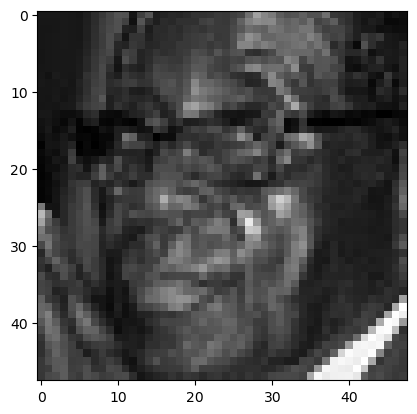

In [25]:
image = 'Face2/training/sad/Sad-56.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 24ms/step
model prediction is  sad


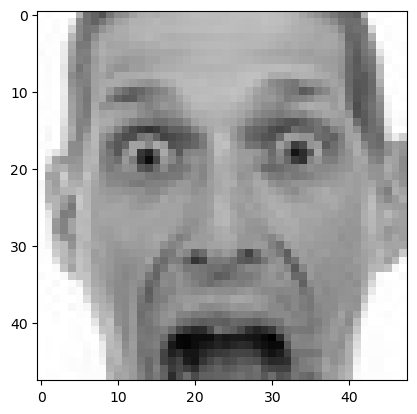

In [26]:
image = 'Face2/training/Fear/Fear-2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 20ms/step
model prediction is  sad


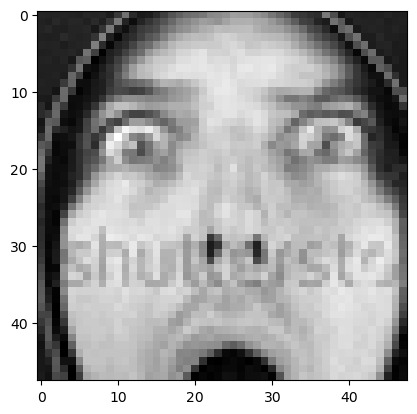

In [27]:
image = 'Face2/training/Suprise/Suprise-9.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')